# Batch Training

In [1]:
import yaml
import pandas as pd

# Path to the YAML configuration file
yaml_file_path = 'feature_store/config_v1.yaml'

# Write the configuration data to a YAML file
with open(yaml_file_path, 'r') as file:
    config = yaml.safe_load(file)

In [2]:
# Get Features
from scripts import feature_store
X_train = feature_store.fetch_data_from_store(yaml_file_path = yaml_file_path)
X_train = X_train.head(-7) # save some rows for later
X_train

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85
...,...,...,...,...,...,...,...,...,...
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13
2024-03-29,125577.0,126118.0,118230.0,122277.0,118592.0,107680.0,109879.0,123498.29,3072.37


In [3]:
# Get targets
from scripts import feature_processing

csv_file_path = 'data/energy_data_new.csv'
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

targets_df = feature_processing.get_targets(df)
targets_df

,target_1d,target_2d,target_3d
period,,,
2024-01-01,128866.0,131883.0,131606.0
2024-01-02,131883.0,131606.0,136960.0
2024-01-03,131606.0,136960.0,130213.0
2024-01-04,136960.0,130213.0,126933.0
2024-01-05,130213.0,126933.0,132752.0
...,...,...,...
2024-03-31,119066.0,124079.0,128889.0
2024-04-01,124079.0,128889.0,127645.0
2024-04-02,128889.0,127645.0,124704.0


In [4]:
feature_store.update_feature_store(targets_df, yaml_file_path, targets = True)

'Targets updated in feature store with last date 2024-04-04 00:00:00'

In [7]:
feature_store.fetch_data_from_store(X_train.index.min(), yaml_file_path, targets = True)

,target_1d,target_2d,target_3d
period,,,
2024-01-14,136704.0,145628.0,151329.0
2024-01-15,145628.0,151329.0,146188.0
2024-01-16,151329.0,146188.0,147359.0
2024-01-17,146188.0,147359.0,144471.0
2024-01-18,147359.0,144471.0,143686.0
...,...,...,...
2024-03-31,119066.0,124079.0,128889.0
2024-04-01,124079.0,128889.0,127645.0
2024-04-02,128889.0,127645.0,124704.0


In [10]:
# Same date range for targes and features
Y_train = feature_store.fetch_data_from_store(X_train.index.min(), yaml_file_path, targets = True)[:X_train.index.max()]
Y_train

,target_1d,target_2d,target_3d
period,,,
2024-01-14,136704.0,145628.0,151329.0
2024-01-15,145628.0,151329.0,146188.0
2024-01-16,151329.0,146188.0,147359.0
2024-01-17,146188.0,147359.0,144471.0
2024-01-18,147359.0,144471.0,143686.0
...,...,...,...
2024-03-27,125577.0,120926.0,113774.0
2024-03-28,120926.0,113774.0,107790.0
2024-03-29,113774.0,107790.0,119066.0


In [11]:
# turn into a list
y_train_ls= []
for target in Y_train.columns:
  y_train_ls.append(Y_train[target])

y_train_ls

[period
 2024-01-14    136704.0
 2024-01-15    145628.0
 2024-01-16    151329.0
 2024-01-17    146188.0
 2024-01-18    147359.0
                 ...   
 2024-03-27    125577.0
 2024-03-28    120926.0
 2024-03-29    113774.0
 2024-03-30    107790.0
 2024-03-31    119066.0
 Name: target_1d, Length: 78, dtype: float64,
 period
 2024-01-14    145628.0
 2024-01-15    151329.0
 2024-01-16    146188.0
 2024-01-17    147359.0
 2024-01-18    144471.0
                 ...   
 2024-03-27    120926.0
 2024-03-28    113774.0
 2024-03-29    107790.0
 2024-03-30    119066.0
 2024-03-31    124079.0
 Name: target_2d, Length: 78, dtype: float64,
 period
 2024-01-14    151329.0
 2024-01-15    146188.0
 2024-01-16    147359.0
 2024-01-17    144471.0
 2024-01-18    143686.0
                 ...   
 2024-03-27    113774.0
 2024-03-28    107790.0
 2024-03-29    119066.0
 2024-03-30    124079.0
 2024-03-31    128889.0
 Name: target_3d, Length: 78, dtype: float64]

In [12]:
# Install XGBoost model
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb

# Loop through targets - train one model for each target variable
cv_results_ls = []
for y_train in y_train_ls:

  # Prepare the DMatrix which is required by XGBoost
  dtrain = xgb.DMatrix(data=X_train, label=y_train)

  # Define XGBoost parameters
  params = {
    #'max_depth': 6,
    #'min_child_weight': 1,
    #'eta': 0.5,
    #'subsample': 1,
    #'colsample_bytree': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
  }

  # Perform cross-validation
  cv_results = xgb.cv(
      params=params,
      dtrain=dtrain,
      num_boost_round=100,
      nfold = 4,
      early_stopping_rounds=10,
      metrics='rmse',
      as_pandas=True,
      seed=123
  )
  cv_results_ls.append(cv_results)
  # Show the last mean RMSE as a measure of final performance
  print(f"Last mean RMSE: {cv_results['test-rmse-mean'][-1:]}")

Last mean RMSE: 99    7477.635081
Name: test-rmse-mean, dtype: float64
Last mean RMSE: 73    7771.95831
Name: test-rmse-mean, dtype: float64
Last mean RMSE: 77    6680.986696
Name: test-rmse-mean, dtype: float64


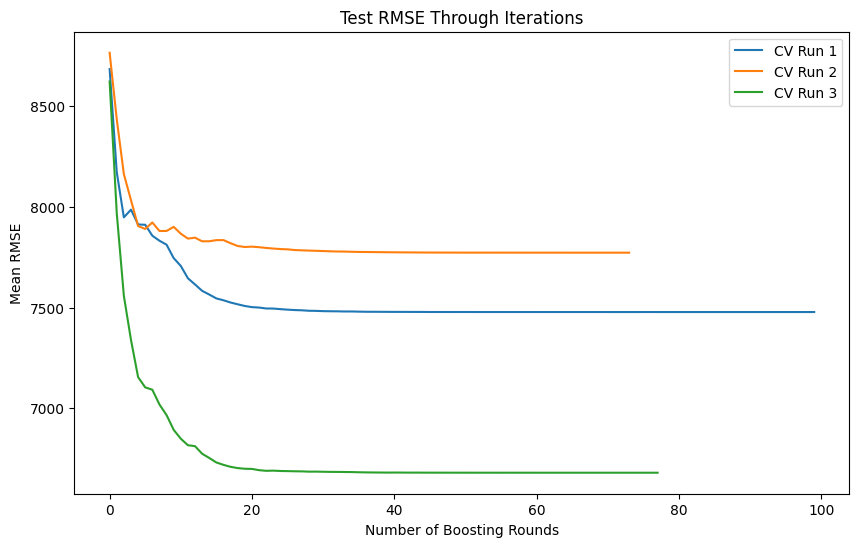

In [51]:
import matplotlib.pyplot as plt

# Plot RMSE through iterations with different colors for each line

plt.figure(figsize=(10, 6))

for idx, cv_results in enumerate(cv_results_ls):
    plt.plot(cv_results['test-rmse-mean'], label=f'CV Run {idx+1}')

plt.title('Test RMSE Through Iterations')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Mean RMSE')
plt.legend()
plt.show()

In [52]:
# List to store the final models
final_models_ls = []

# Use the same params here you used in cross-validation
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
  }

# Iterate through each set of cross-validation results and corresponding training targets
for cv_results, y_train in zip(cv_results_ls, y_train_ls):
    # Determine the optimal number of boosting rounds from cross-validation results
    optimal_boost_rounds = cv_results['test-rmse-mean'].idxmin() + 1

    # Initialize the XGBoost regressor with determined parameters
    final_model = xgb.XGBRegressor(
        n_estimators=optimal_boost_rounds,
        **params
    )

    # Train the model on the full training dataset
    final_model.fit(X_train, y_train)

    # Append the trained model to the list
    final_models_ls.append(final_model)

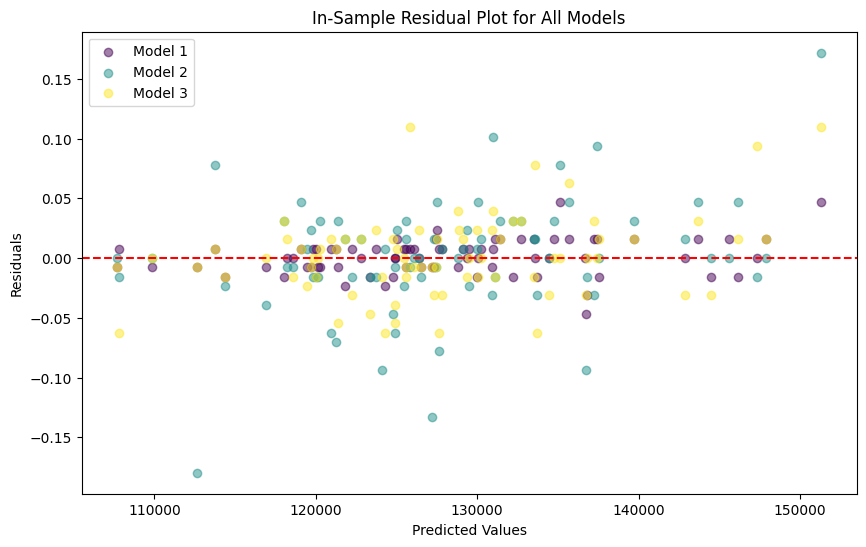

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate residual plot

# Initialize lists to hold all predicted values and residuals
all_y_pred = []
all_residuals = []

# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(final_models_ls)))

# Plot residuals for each model
plt.figure(figsize=(10, 6))

for idx, (final_model, y_train) in enumerate(zip(final_models_ls, y_train_ls)):
    # Make predictions
    y_pred = final_model.predict(X_train)

    # Calculate residuals
    residuals = y_train - y_pred

    # Plot residuals with a unique color for each model
    plt.scatter(y_pred, residuals, color=colors[idx], alpha=0.5, label=f'Model {idx+1}')

# Add plot title and labels
plt.axhline(y=0, color='red', linestyle='--')
plt.title('In-Sample Residual Plot for All Models')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()  # Add a legend to differentiate each model
plt.show()

In [54]:
import joblib

# Save each model with a unique filename
for idx, final_model in enumerate(final_models_ls):
    filename = f'models/batch_demand_forecaster_model_{idx+1}.pkl'  # Create a unique filename for each model
    joblib.dump(final_model, filename)